<u><h1><center>**UBER-Pickups**

# <u> Part 1 : Import libraries and load the dataset

<u><h4>1.Import useful modules

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = "iframe_connected"

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


<u><h4>2.Load the data

In [2]:
#Import dataset
print("Loading dataset...")
df = pd.read_csv("/Users/nadiapreuvot/Desktop/Uber_pickups/uber-raw-data-jun14.csv")
print("...Done")
print()

Loading dataset...
...Done



In [3]:
#Basics stats
print("Number of rows: {}".format(df.shape[0]))
print("Number of columns: {}".format(df.shape[1]))
print()

print ("Display of dataset: ")
display(df.head())
print()

Number of rows: 663844
Number of columns: 4

Display of dataset: 


,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512


# <u> Part 2 : Data Preprocessing and EDA

<u><h4>1. Preprocessing

As the dataset is quite big, we will proceed with a sample of the dataset.

In [4]:
df_sample= df.sample(30000, random_state=0)

In [5]:
#Basics stats
print("Number of rows: {}".format(df_sample.shape[0]))
print("Number of columns: {}".format(df_sample.shape[1]))
print()
print ("Dsipaly of dataset: ")
display(df_sample.head())
print()
print ("Basics statistics: ")
df_desc= df_sample.describe(include="all")
display(df_desc)
print()
print("Percentage of missing values: ")
display(100*df_sample.isnull().sum()/df_sample.shape[0])
print()
print("Types of data")
display(df_sample.dtypes)

Number of rows: 30000
Number of columns: 4

Dsipaly of dataset: 


,Date/Time,Lat,Lon,Base
348280,6/13/2014 19:00:00,40.6936,-73.9560,B02617
156470,6/15/2014 13:56:00,40.7355,-74.0037,B02598
532688,6/11/2014 20:39:00,40.7070,-74.0137,B02682
90217,6/7/2014 21:44:00,40.7051,-74.0100,B02598
103242,6/9/2014 16:14:00,40.7601,-73.9717,B02598



Basics statistics: 


,Date/Time,Lat,Lon,Base
count,30000,30000.000000,30000.000000,30000
unique,19781,NaN,NaN,5
top,6/13/2014 16:27:00,NaN,NaN,B02598
freq,10,NaN,NaN,11077
mean,NaN,40.740111,-73.974471,NaN
std,NaN,0.037969,0.055634,NaN
min,NaN,40.175500,-74.588600,NaN
25%,NaN,40.722000,-73.996900,NaN
50%,NaN,40.743800,-73.983700,NaN
75%,NaN,40.761300,-73.968000,NaN



Percentage of missing values: 


Date/Time    0.0
Lat          0.0
Lon          0.0
Base         0.0
dtype: float64


Types of data


Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

<u><h4>2. Data transformation

In [6]:
#Let's convert [date/time] column into a datetime
print("Converting Date/Time object into datetime...")
df_sample["Date/Time"] = pd.to_datetime(df_sample["Date/Time"])
df_sample.dtypes
print("...Done.")

Converting Date/Time object into datetime...
...Done.


In [7]:
#Let's replace the Date/Time column into several columns
#Exctract the day of week
print("Creating DayofWeek column...")
df_sample["DayOfWeek"]= df_sample["Date/Time"].dt.day_name()
print("...Done.")

#Create a column day
print("Creating Day column...")
df_sample["Day"] = df_sample["Date/Time"].dt.day
print("...Done.")

#Create a column Hour
print("Creating Hour column...")
df_sample["Hour"] = df_sample["Date/Time"].dt.hour
print("...Done")
#Drop useless columns Date/Time and Base
print("Dropping columns Date/Time and Base...")
df_sample = df_sample.drop(["Date/Time", "Base"], axis=1)
print("...Done.")



Creating DayofWeek column...
...Done.
Creating Day column...
...Done.
Creating Hour column...
...Done
Dropping columns Date/Time and Base...
...Done.


In [8]:
print("Number of rows: {}".format(df_sample.shape[0]))
print("Number of columns: {}".format(df_sample.shape[1]))
print()
print ("Dsipaly of dataset: ")
display(df_sample.head())

Number of rows: 30000
Number of columns: 5

Dsipaly of dataset: 


,Lat,Lon,DayOfWeek,Day,Hour
348280,40.6936,-73.9560,Friday,13,19
156470,40.7355,-74.0037,Sunday,15,13
532688,40.7070,-74.0137,Wednesday,11,20
90217,40.7051,-74.0100,Saturday,7,21
103242,40.7601,-73.9717,Monday,9,16


<u><h4> 3. EDA

Visualizing the distribution of Uber pickups based on day of the week and time of day, which is useful for identifying demand trends

<u>3.1 Geographic distribution map of Uber pickups

In [9]:
# Create the map
fig = px.scatter_mapbox(df_sample, lat="Lat", lon="Lon", color="DayOfWeek", mapbox_style="carto-positron")
fig.update_layout(title='Distribution of Uber Pickups by Day of the Week')

# Configuration du renderer pour ouvrir le graphique dans un navigateur web
pio.renderers.default = "browser"
fig.show()


<u>3.2 Analysis of Uber Ride Patterns: Hourly and Weekly Distribution"

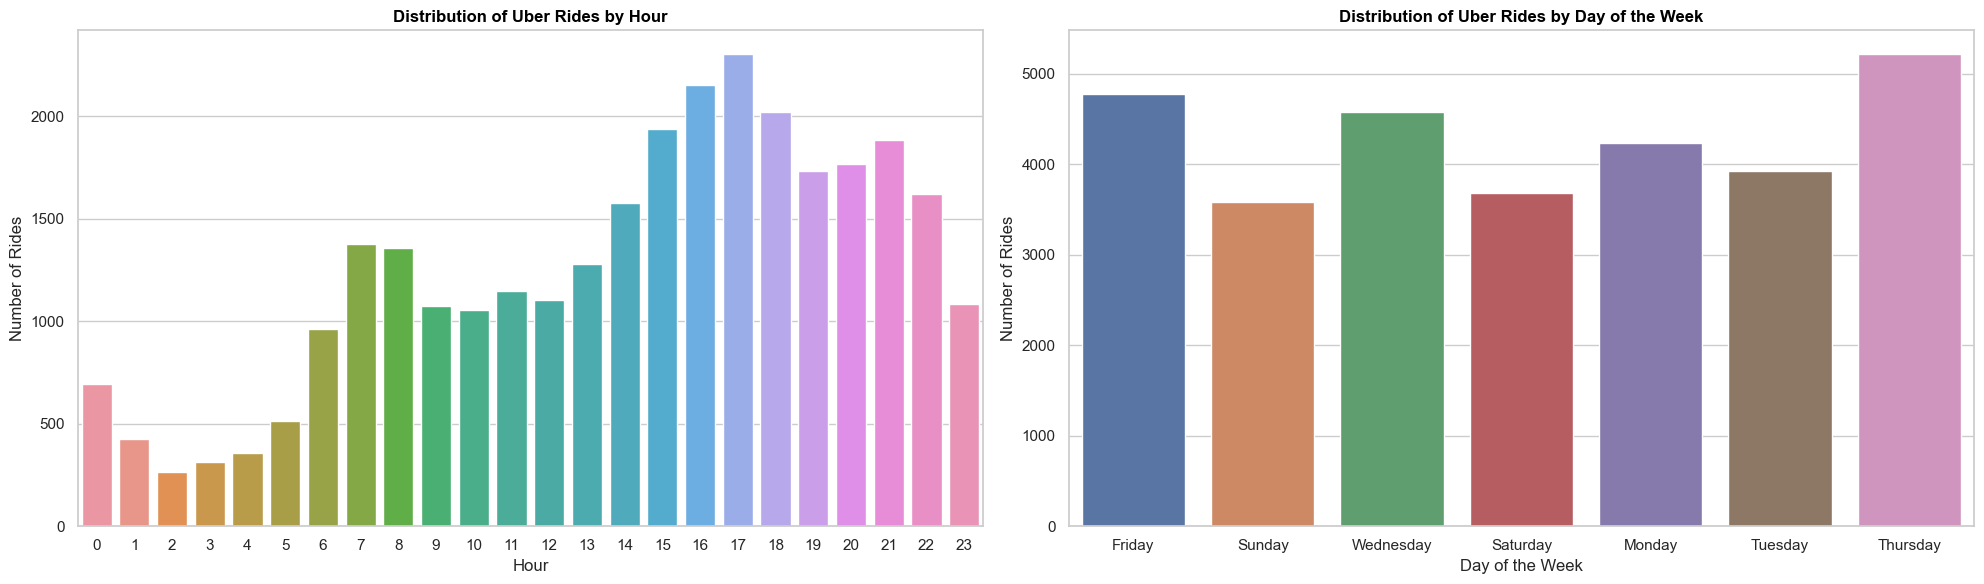

In [10]:
# Configuration du style 
sns.set(style="whitegrid")

# In order to create graphs side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Distribution graph of Uber Rides by Hour
sns.countplot(x='Hour', data=df_sample, ax=axes[0])
axes[0].set_title('Distribution of Uber Rides by Hour', fontsize=12, fontweight='bold', color='black')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Number of Rides')

# Distribution graph by Day of the week
sns.countplot(x='DayOfWeek', data=df_sample, ax=axes[1])
axes[1].set_title('Distribution of Uber Rides by Day of the Week', fontsize=12, fontweight='bold', color='black')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Rides')

plt.tight_layout()
plt.show()


</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
1)The first graph shows the number of Uber pickups at each hour of the day.</br>
There are notable spikes in activity, particularly during peak hours, usually in the late afternoon and evening. It could correspond to rush hours</br>
Off-peak times appear to be during the late night and early morning hours, which is expected as fewer people travel during these hours.
</br>
</br>
2)The second graph illustrates the distribution of support for each day of the week.</br>
There are variations in the number of pick-ups between days, indicating a fluctuation in demand during the week.</br>
The days with the highest number of pick-ups may correspond to working days or periods of high social activity (such as Friday and Saturday evenings).</br>
</br>
Thus, the data reveals important trends in Uber user behavior, with significant variations on both a daily and weekly basis.</br>
</br>
These insights are essential for understanding demand trends and can be used for strategic planning of driver placement. </br>
Uber could recommend more drivers to position themselves in key areas during these periods to reduce user waiting times.

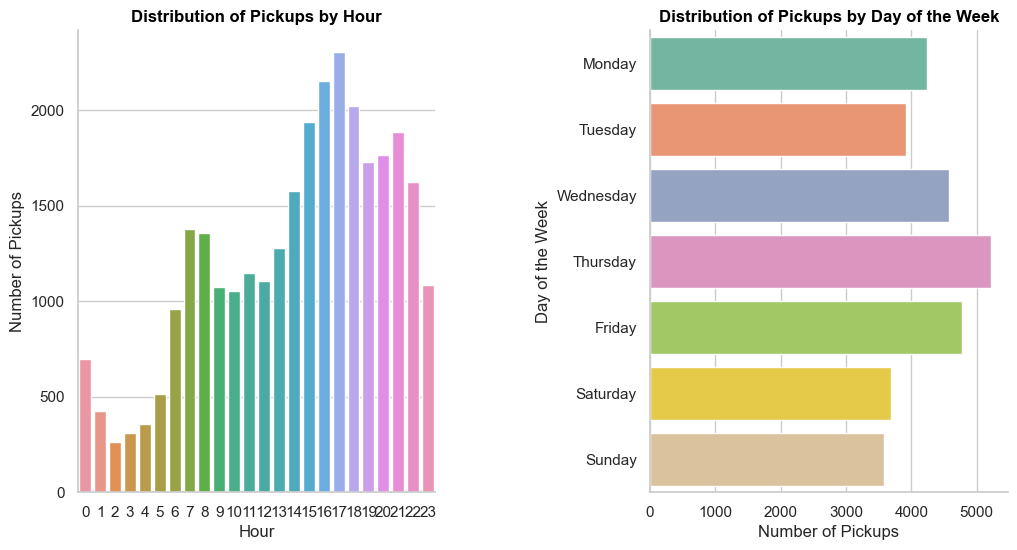

In [11]:
# Create the plots
plt.figure(figsize=(12, 6))

# Distribution of pickups by hour
plt.subplot(1, 2, 1)
sns.countplot(x='Hour', data=df_sample)
plt.title('Distribution of Pickups by Hour' , fontsize=12, fontweight='bold', color='black')
plt.xlabel('Hour')
plt.ylabel('Number of Pickups')

# Distribution of pickups by day of the week
plt.subplot(1, 2, 2)
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(y='DayOfWeek', data=df_sample, order=order, palette="Set2")
plt.title('Distribution of Pickups by Day of the Week' , fontsize=12, fontweight='bold', color='black')
plt.xlabel('Number of Pickups')
plt.ylabel('Day of the Week')

plt.subplots_adjust(wspace=0.6)
sns.despine() # to get rid of the spine on the graph

<u>3.3 Monthly Ride Trend Analysis: Daily Distribution of Uber Rides



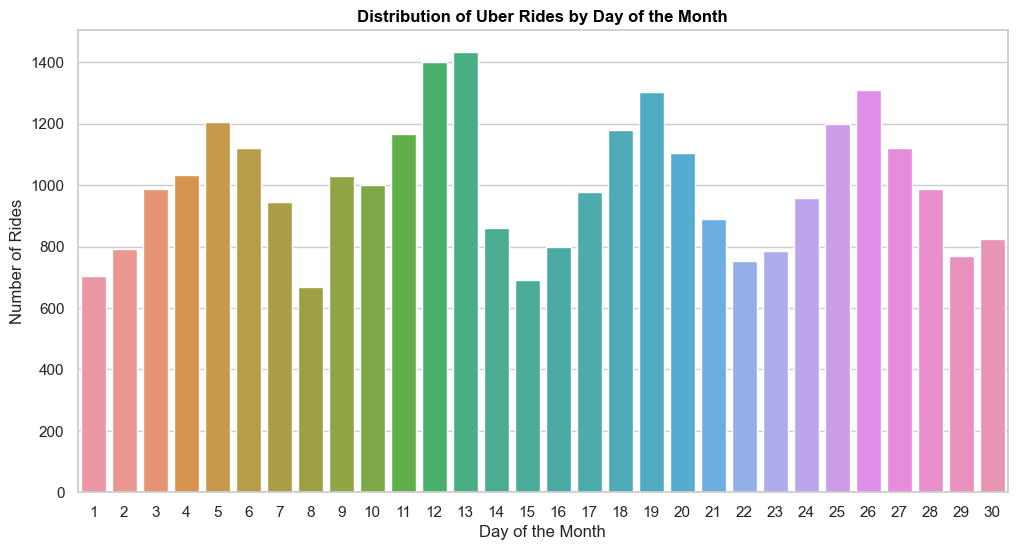

In [12]:
#Distribution of Rides by Day of the Month
plt.figure(figsize=(12, 6))
sns.countplot(x='Day', data=df_sample)
plt.title('Distribution of Uber Rides by Day of the Month', fontsize=12, fontweight='bold', color='black')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Rides')
plt.show()

</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
There is a marked fluctuation in the number of races from day to day. This indicates a significant change in demand for Uber rides over the month.</br>
Around days 9 and 10, as well as towards the end of the month (days 25 to 29), peaks in demand are observed. </br>
This could be due to local events, payroll-related behavioral changes, or other seasonal or calendar factors.</br>
it would be necessary to consider contextual factors such as corresponding days of the week, holidays, special events, and weather conditions

<u>3.4 Temporal Heatmap of Uber Ride Frequencies by Hour and Day of the Week

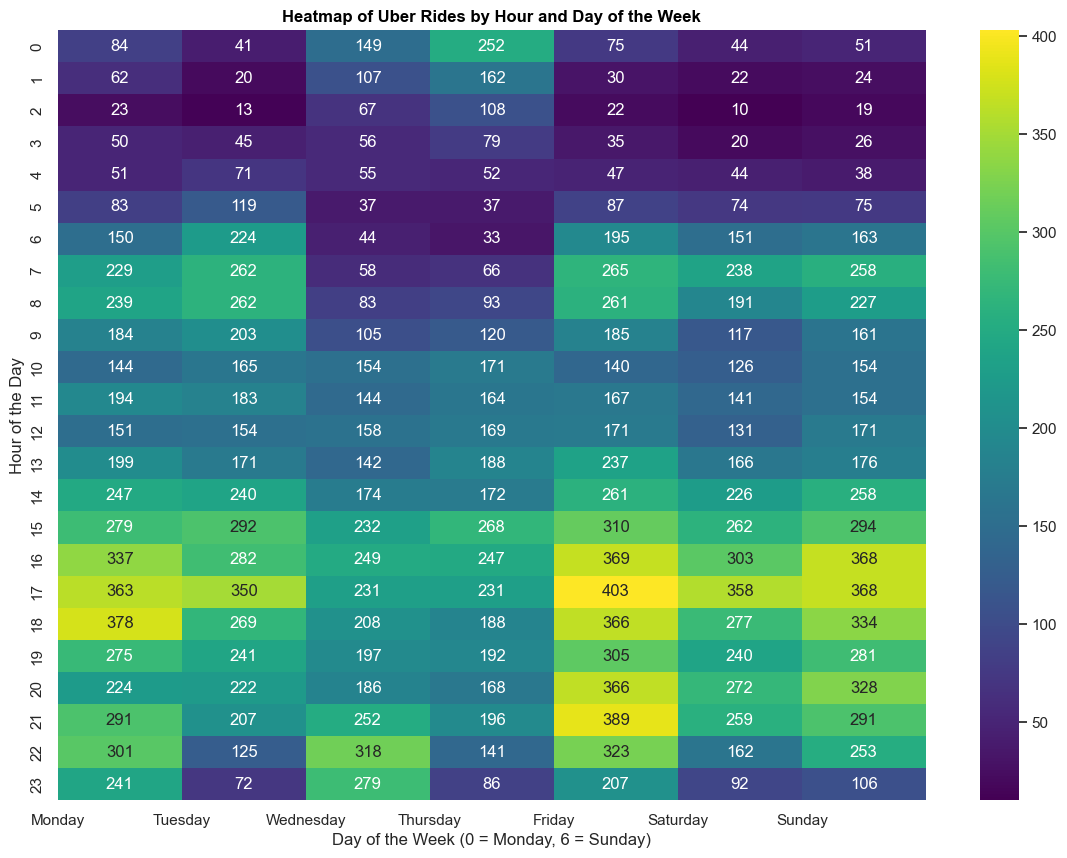

In [13]:
#Creating a cross table for visualization
hour_weekday_cross = pd.crosstab(df_sample['Hour'], df_sample['DayOfWeek'])

plt.figure(figsize=(14, 10))
sns.heatmap(hour_weekday_cross, cmap="viridis", annot=True, fmt="d")
plt.title('Heatmap of Uber Rides by Hour and Day of the Week', fontsize=12, fontweight='bold', color='black')
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Hour of the Day')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
The heatmap clearly shows certain periods of the day where activity is higher. </br>
These peaks of activity can correspond to rush hours, typically in the morning when people go to work and in the evening when they return home.</br>
Darker areas on the heatmap indicate periods of low activity. These periods may be during the late hours of the night.


# <u> Part 3 :  Clustering 

<u><h4>1. Implementing the KMeans Algorithm 

Let's train a Kmeans model to gather location data (latitude and longitude)

<u>1.1 Preprocessing

In [14]:
#Create pipeline for numeric features
numeric_features = ["Lat", "Lon", "Day", "Hour"]
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_features = ["DayOfWeek"]
categorical_transformer = Pipeline(
    steps=[
        ('encoder', OneHotEncoder(drop='first'))
    ]
)

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

#Preprocessing on the dataset
print("Performing preprocessing on the train set")
print(df_sample.head())

#Fit transform
X= preprocessor.fit_transform(df_sample)
print("...Done.")
print(X[0:5, :])

Performing preprocessing on the train set
            Lat      Lon  DayOfWeek  Day  Hour
348280  40.6936 -73.9560     Friday   13    19
156470  40.7355 -74.0037     Sunday   15    13
532688  40.7070 -74.0137  Wednesday   11    20
90217   40.7051 -74.0100   Saturday    7    21
103242  40.7601 -73.9717     Monday    9    16
...Done.
[[-1.22500231  0.33202046 -0.30359347  0.81942107  0.          0.
   0.          0.          0.          0.        ]
 [-0.12144376 -0.52538932 -0.06667329 -0.19359253  0.          0.
   1.          0.          0.          0.        ]
 [-0.87207428 -0.7051398  -0.54051365  0.98825667  0.          0.
   0.          0.          0.          1.        ]
 [-0.92211631 -0.63863212 -1.014354    1.15709227  0.          1.
   0.          0.          0.          0.        ]
 [ 0.52646889  0.04981221 -0.77743383  0.31291427  1.          0.
   0.          0.          0.          0.        ]]


<u> 1.2 Build a cluster

We are going to build our clusters, but to do so, we need to know the optimal number of clusters we need for Kmeans.<br/> 
First use, the Elbow method to see how many we need to take as a value for k.

<U>A). The Elbow Method

In [15]:
wcss = []
k= []
for i in range( 2, 15 ): # nb of cluster to be tested with Kmeans
    kmeans = KMeans(n_clusters=i , random_state = 0, n_init = 10)    
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
print(wcss)

[118961.49503141682, 101909.12239598567, 87400.43855322004, 80427.32752932672, 74180.5616660182, 69426.28944077455, 65294.18310802576, 63017.970474963266, 60824.22003284483, 58849.54803188509, 56708.372372517115, 55075.55151815902, 53343.312671485066]


</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
The results obtained are the inertia values ​​for different numbers of clusters (from 2 to 14) using the KMeans algorithm.</br>
Inertia values ​​decrease as the number of clusters increases.</br>
The lower the inertia value, the better, as it indicates that the data points are closer to their respective centroid, meaning tighter grouping.

<U>A).1 The Elbow Method Visualisation

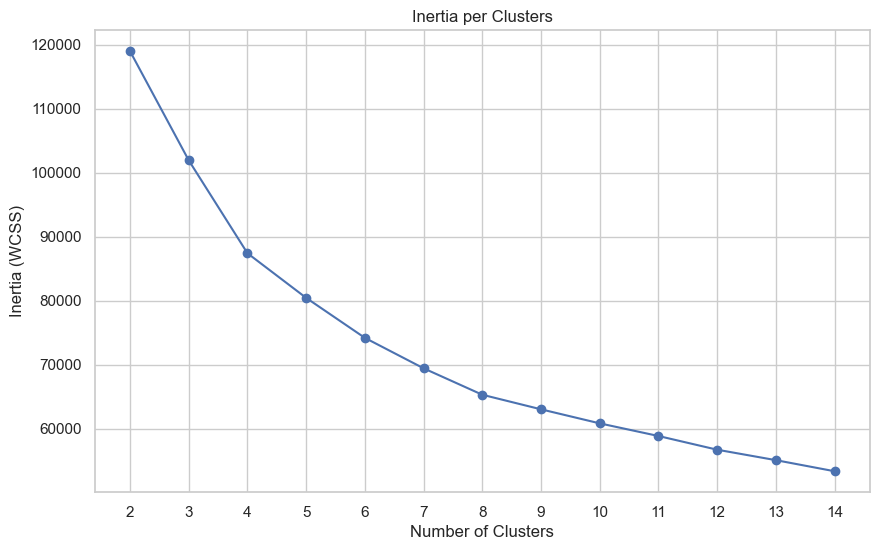

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(k, wcss, marker='o')
plt.title('Inertia per Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.xticks(range(2, 15))
plt.show()

</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
The "elbow" is not extremely pronounced.</br>
it seems to start to stabilize around 4 / 5 clusters, cause the inertia begins to decrease less quickly.</br>
As the number of clusters increases, inertia decreases rapidly.</br>

However, there is no significant change in inertia after about 10 clusters, meaning that adding more clusters beyond this number does not provide much improvement.


The choice of number of clusters is not clear from the graph, we could also consider additional methods like silhouette analysis to confirm our choice and refine our hypothesis for K.

<U>B). The Silhouette Method

In [17]:
s_score = []
k = []
for i in range ( 2, 15):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init = 10) 
    kmeans.fit(X)
    s_score.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
print(s_score)
    

[0.18036039029241868, 0.19788368745011892, 0.1974027058978294, 0.1918360496795684, 0.1872041238948594, 0.18764533000775252, 0.19513752557245567, 0.16881776905561927, 0.1608879341185698, 0.16606632423225742, 0.1454090669169594, 0.14744734789215788, 0.13959125743566705]


</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
The highest silhouette score is around 0.197, which occurs for models with 3 and 4 clusters.</br>
A notable drop occurs after 8 clusters, where the score drops to 0.168 and continues to decrease with increasing number of clusters.</br>
The lowest scores are observed for 11 to 14 clusters, falling below 0.15.

B).1 The silouhette Method Visualisation

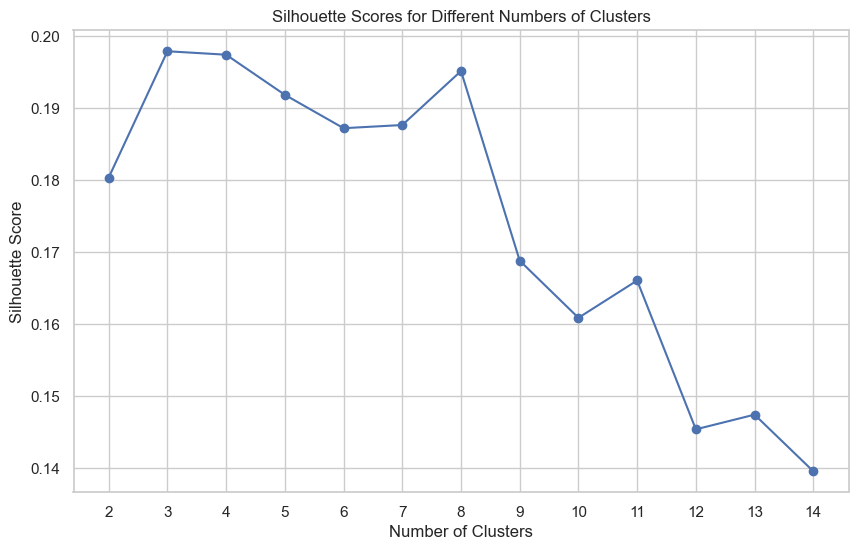

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(k, s_score, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 15))
plt.show()

</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
Silhouette score fluctuates as number of clusters increases.</br>
The score reaches its peak for 3 clusters.</br>
There is a noticeable drop in silhouette scores after 8 clusters.</br>
The scores are all above 0, indicating that no clusters are significantly misassigned.</br>
Scores are not extremely high (not close to 1), which could indicate that the clusters are not perfectly distinct.</br>
Based on this graph, one might consider choosing 3 or 4 clusters for the final model, as these are the numbers of clusters that have the highest silhouette scores.


let's re-train a KMeans with the optimal number of clusters with k = 3

In [19]:
kmeans= KMeans (n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [20]:
df_sample["Cluster_KMeans"] = kmeans.labels_
df_sample.head()
# Select df_sample per 'hour'
df_sample_sorted = df_sample.sort_values('Hour')

df_sample_sorted.head()




,Lat,Lon,DayOfWeek,Day,Hour,Cluster_KMeans
209098,40.7241,-73.9876,Sunday,22,0,0
255920,40.7446,-73.9755,Saturday,28,0,0
470544,40.7949,-73.9724,Tuesday,3,0,1
255838,40.7400,-74.0053,Saturday,28,0,0
312176,40.7666,-73.9793,Sunday,8,0,1


In [21]:
#Visualisation
fig = px.scatter_mapbox(df_sample_sorted, 
                        lat="Lat", 
                        lon="Lon", 
                        color="Cluster_KMeans",
                         zoom=10,
                        mapbox_style="carto-positron", animation_frame="Hour")
fig.update_layout(title=' KMeans Clustering Visualization : Hourly Evolution of Uber Demand Hotspots ') 
fig.show()

<u><h4>2. Implementing the DBSCAN Algorithm 

<u>2.1 Preprocessing

In [22]:
#Create pipeline for numeric features
numeric_features = ["Lat", "Lon", "Day", "Hour"]
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_features = ["DayOfWeek"]
categorical_transformer = Pipeline(
    steps=[
        ('encoder', OneHotEncoder(drop='first'))
    ])

## Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ])

#Preprocessing on the dataset
print("Performing preprocessing on the train set")
print(df_sample.head())

#Fit transform
X = preprocessor.fit_transform(df_sample)
print("...Done.")
print(X[0:5, :])

Performing preprocessing on the train set
            Lat      Lon  DayOfWeek  Day  Hour  Cluster_KMeans
348280  40.6936 -73.9560     Friday   13    19               1
156470  40.7355 -74.0037     Sunday   15    13               1
532688  40.7070 -74.0137  Wednesday   11    20               1
90217   40.7051 -74.0100   Saturday    7    21               1
103242  40.7601 -73.9717     Monday    9    16               1
...Done.
[[-1.22500231  0.33202046 -0.30359347  0.81942107  0.          0.
   0.          0.          0.          0.        ]
 [-0.12144376 -0.52538932 -0.06667329 -0.19359253  0.          0.
   1.          0.          0.          0.        ]
 [-0.87207428 -0.7051398  -0.54051365  0.98825667  0.          0.
   0.          0.          0.          1.        ]
 [-0.92211631 -0.63863212 -1.014354    1.15709227  0.          1.
   0.          0.          0.          0.        ]
 [ 0.52646889  0.04981221 -0.77743383  0.31291427  1.          0.
   0.          0.          0.        

In [23]:
#Identify Clusters
db = DBSCAN(eps = 0.3, min_samples = 25, metric = "manhattan")
db.fit(X)
labels = db.labels_
np.unique(db.labels_, return_counts=True) # to get the number of clusters

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 array([24787,   152,   372,   326,   228,   246,   301,   217,    52,
          395,   119,   262,   123,    62,   241,    34,    28,   378,
          121,   301,   151,    91,    41,   106,    62,   130,    31,
           63,    54,    59,    50,    30,    25,    33,    37,    72,
           20,    29,    16,    40,    27,    12,    25,    36,    15]))

</u><ins><center> <font color="bleu"><ins>Observations</font> </center>
</br>
The first element -1 represents the points considered as noise by the algorithm. These points do not fit into any of the clusters formed.</br>
With 24787 points marked as noise, this suggests that the DBSCAN algorithm found a large portion of the data points to not correspond to dense areas of supports.</br>
There are 44 distinct clusters (0 to 43) identified by the algorithm, in addition to the noise points.</br>
Some clusters, such as clusters 1, 2, 3, 4, and 5, have relatively larger sizes, suggesting denser support zones or "hot-zones".</br>


In [24]:
#Create a new column Cluster
df_sample.loc[:, "db_cluster"] = labels
df_sample.head()

,Lat,Lon,DayOfWeek,Day,Hour,Cluster_KMeans,db_cluster
348280,40.6936,-73.9560,Friday,13,19,1,-1
156470,40.7355,-74.0037,Sunday,15,13,1,-1
532688,40.7070,-74.0137,Wednesday,11,20,1,-1
90217,40.7051,-74.0100,Saturday,7,21,1,-1
103242,40.7601,-73.9717,Monday,9,16,1,0


In [25]:
#Visualisation
filtered_df = df_sample[df_sample['db_cluster'] != -1] # eliminate the noise
fig = px.scatter_mapbox(filtered_df, 
                        lat="Lat", 
                        lon="Lon", 
                        color="db_cluster", 
                        zoom=10,
                        mapbox_style="carto-positron")
fig.update_layout(title=' DBSCAN Cluster Analysis: Spatial Distribution of Uber Pickups in Urban Areas ') 

fig.show()

In [26]:
#Visualisation
filtered_df = df_sample[df_sample['db_cluster'] != -1] # eliminate the noise

fig = px.scatter_mapbox(filtered_df, 
                        lat="Lat", 
                        lon="Lon", 
                        color="DayOfWeek", 
                        zoom=10,  
                        mapbox_style="carto-positron")
fig.update_layout(title="DBSCAN: Spatial Distribution Clustering of Uber Pickups by dayofweek")
fig.show()
